Connecting to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing packages

In [ ]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt

Ignore Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Read the dataset

In [ ]:
# Read the data file
data = pd.read_csv('/content/drive/MyDrive/supermarket_churnData.csv')

Display top 5 rows

In [ ]:
data.head()

,row_number,invoice_id,branch,customer_id,gender,age,customer_type,credit_score,has_creditcard,is_active_member,product_category,number_of_products,tax_amount,price,total_amount,ratings,customer_churn
0,1,655-07-2265,A,15681196,Male,35,Normal,629,1,1,Electronic accessories,3,11.7465,78.31,246.6765,5.4,0
1,2,689-05-1884,A,15809006,Male,23,Member,602,0,0,Health and beauty,10,24.3150,48.63,510.6150,8.8,0
2,3,883-17-4236,C,15749947,Female,44,Normal,665,1,1,Sports and travel,2,1.4390,14.39,30.2190,7.2,0
3,4,453-33-6436,A,15655590,Male,46,Normal,581,0,0,Home and lifestyle,8,37.2480,93.12,782.2080,6.8,0
4,5,250-17-5703,A,15624975,Male,28,Member,693,0,1,Food and beverages,10,9.4250,18.85,197.9250,5.6,0


Remove the un necessary columns from the dataset

In [ ]:
# Remove 'row_number', 'invoice_id', and 'customer_id' from the dataset
data = data.drop(['row_number', 'invoice_id', 'customer_id'], axis=1)

# Display the top 5 rows of the cleaned dataset to confirm removal
data.head()


,branch,gender,age,customer_type,credit_score,has_creditcard,is_active_member,product_category,number_of_products,tax_amount,price,total_amount,ratings,customer_churn
0,A,Male,35,Normal,629,1,1,Electronic accessories,3,11.7465,78.31,246.6765,5.4,0
1,A,Male,23,Member,602,0,0,Health and beauty,10,24.3150,48.63,510.6150,8.8,0
2,C,Female,44,Normal,665,1,1,Sports and travel,2,1.4390,14.39,30.2190,7.2,0
3,A,Male,46,Normal,581,0,0,Home and lifestyle,8,37.2480,93.12,782.2080,6.8,0
4,A,Male,28,Member,693,0,1,Food and beverages,10,9.4250,18.85,197.9250,5.6,0


Visualizations

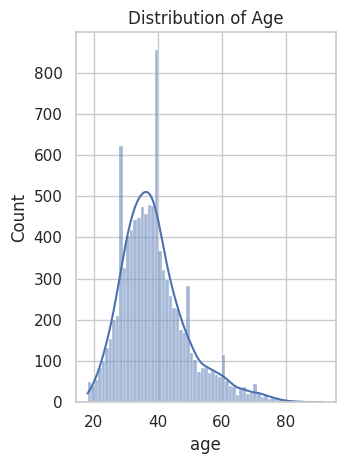

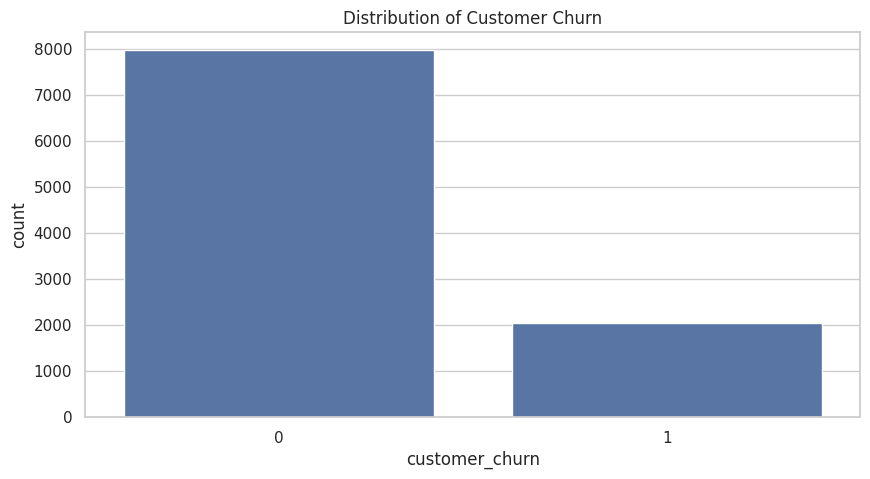

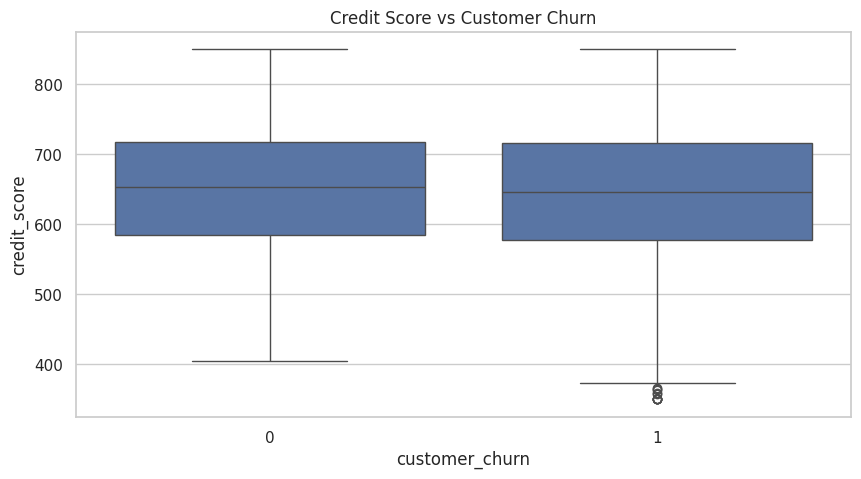

,age,credit_score,has_creditcard,is_active_member,number_of_products,tax_amount,price,total_amount,ratings,customer_churn
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,650.528800,0.70550,0.515100,5.510000,15.379369,55.672130,322.966749,6.972700,0.203700
std,10.487806,96.653299,0.45584,0.499797,2.922115,11.703555,26.482702,245.774651,1.717807,0.402769
min,18.000000,350.000000,0.00000,0.000000,1.000000,0.508500,10.080000,10.678500,4.000000,0.000000
25%,32.000000,584.000000,0.00000,0.000000,3.000000,5.924875,32.875000,124.422375,5.500000,0.000000
50%,37.000000,652.000000,1.00000,1.000000,5.000000,12.088000,55.230000,253.848000,7.000000,0.000000
75%,44.000000,718.000000,1.00000,1.000000,8.000000,22.445250,77.935000,471.350250,8.500000,0.000000
max,92.000000,850.000000,1.00000,1.000000,10.000000,49.650000,99.960000,1042.650000,10.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Summary statistics for numerical features
summary_statistics = data.describe()



# Distribution of age
plt.subplot(1, 2, 2)
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.tight_layout()

# Distribution of customer churn
plt.figure(figsize=(10, 5))
sns.countplot(x='customer_churn', data=data)
plt.title('Distribution of Customer Churn')

# Boxplot for credit score
plt.figure(figsize=(10, 5))
sns.boxplot(x='customer_churn', y='credit_score', data=data)
plt.title('Credit Score vs Customer Churn')

plt.show()

summary_statistics


Pair plot Relationships

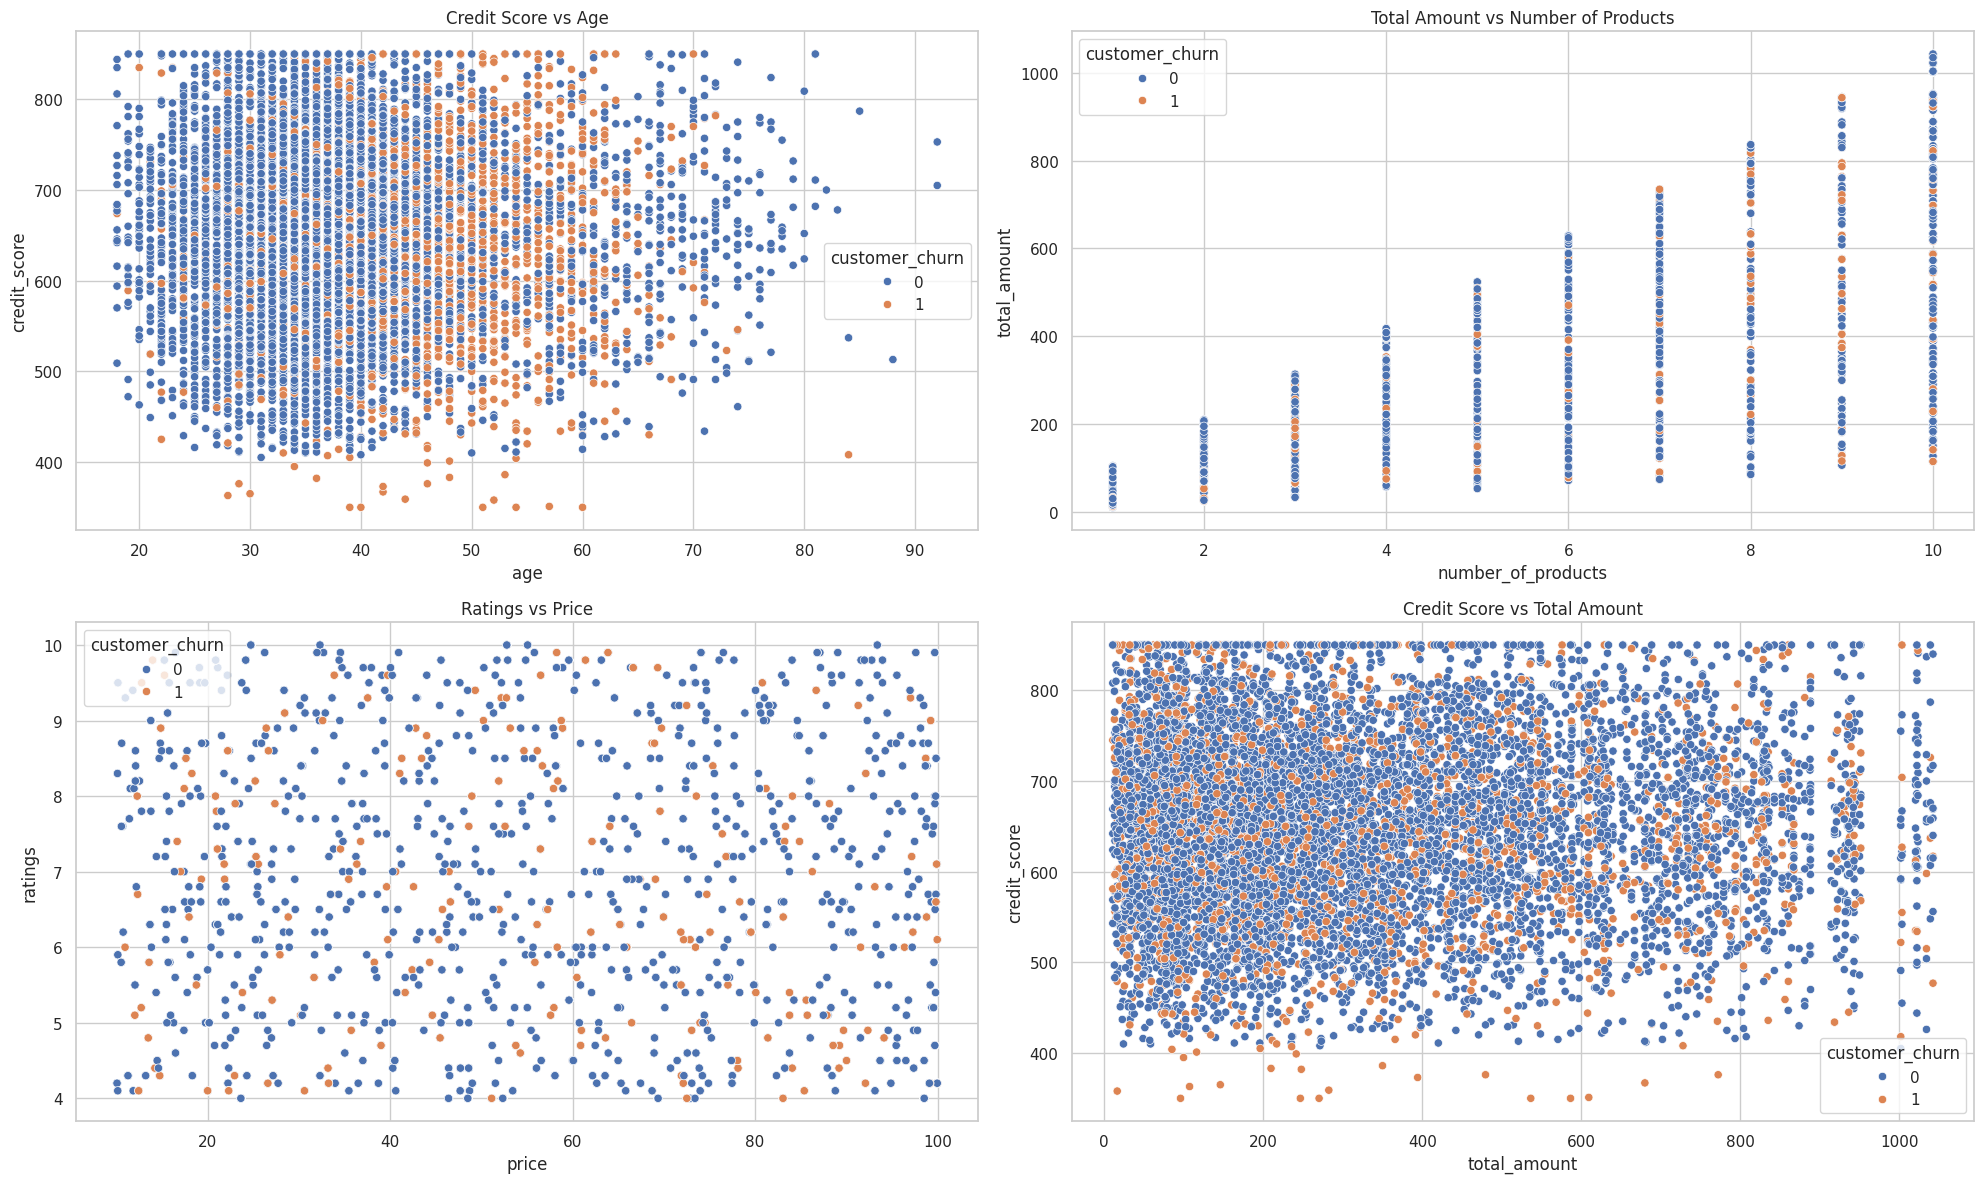

In [ ]:
# Set up the figure layout
plt.figure(figsize=(20, 12))

# Plotting bivariate relationships
# 1. Credit Score vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='credit_score', hue='customer_churn', data=data)
plt.title('Credit Score vs Age')

# 2. Total Amount vs Number of Products
plt.subplot(2, 2, 2)
sns.scatterplot(x='number_of_products', y='total_amount', hue='customer_churn', data=data)
plt.title('Total Amount vs Number of Products')

# 3. Ratings vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='price', y='ratings', hue='customer_churn', data=data)
plt.title('Ratings vs Price')

# 4. Credit Score vs Total Amount
plt.subplot(2, 2, 4)
sns.scatterplot(x='total_amount', y='credit_score', hue='customer_churn', data=data)
plt.title('Credit Score vs Total Amount')

plt.tight_layout()
plt.show()


Checking for Missing Values

In [ ]:
# Checking for missing values in each column of the dataset
missing_values = data.isnull().sum()
missing_values


branch                0
gender                0
age                   0
customer_type         0
credit_score          0
has_creditcard        0
is_active_member      0
product_category      0
number_of_products    0
tax_amount            0
price                 0
total_amount          0
ratings               0
customer_churn        0
dtype: int64

Data type conversion - Changing Categorical variables to numerical variables

In [ ]:
# Applying one-hot encoding to the categorical variables
data = pd.get_dummies(data, columns=['branch', 'gender', 'customer_type', 'product_category'])

# Display the top 5 rows of the encoded dataset to confirm the encoding
data.head()


,age,credit_score,has_creditcard,is_active_member,number_of_products,tax_amount,price,total_amount,ratings,customer_churn,...,gender_Female,gender_Male,customer_type_Member,customer_type_Normal,product_category_Electronic accessories,product_category_Fashion accessories,product_category_Food and beverages,product_category_Health and beauty,product_category_Home and lifestyle,product_category_Sports and travel
0,35,629,1,1,3,11.7465,78.31,246.6765,5.4,0,...,False,True,False,True,True,False,False,False,False,False
1,23,602,0,0,10,24.3150,48.63,510.6150,8.8,0,...,False,True,True,False,False,False,False,True,False,False
2,44,665,1,1,2,1.4390,14.39,30.2190,7.2,0,...,True,False,False,True,False,False,False,False,False,True
3,46,581,0,0,8,37.2480,93.12,782.2080,6.8,0,...,False,True,False,True,False,False,False,False,True,False
4,28,693,0,1,10,9.4250,18.85,197.9250,5.6,0,...,False,True,True,False,False,False,True,False,False,False


In [ ]:
# Applying one-hot encoding to the categorical columns
data = pd.get_dummies(data, drop_first=True)

# Display the shape and some columns of the encoded dataset to confirm the transformation
data.shape
data.columns
data.head()




,age,credit_score,has_creditcard,is_active_member,number_of_products,tax_amount,price,total_amount,ratings,customer_churn,...,gender_Female,gender_Male,customer_type_Member,customer_type_Normal,product_category_Electronic accessories,product_category_Fashion accessories,product_category_Food and beverages,product_category_Health and beauty,product_category_Home and lifestyle,product_category_Sports and travel
0,35,629,1,1,3,11.7465,78.31,246.6765,5.4,0,...,False,True,False,True,True,False,False,False,False,False
1,23,602,0,0,10,24.3150,48.63,510.6150,8.8,0,...,False,True,True,False,False,False,False,True,False,False
2,44,665,1,1,2,1.4390,14.39,30.2190,7.2,0,...,True,False,False,True,False,False,False,False,False,True
3,46,581,0,0,8,37.2480,93.12,782.2080,6.8,0,...,False,True,False,True,False,False,False,False,True,False
4,28,693,0,1,10,9.4250,18.85,197.9250,5.6,0,...,False,True,True,False,False,False,True,False,False,False


Checking for outliers

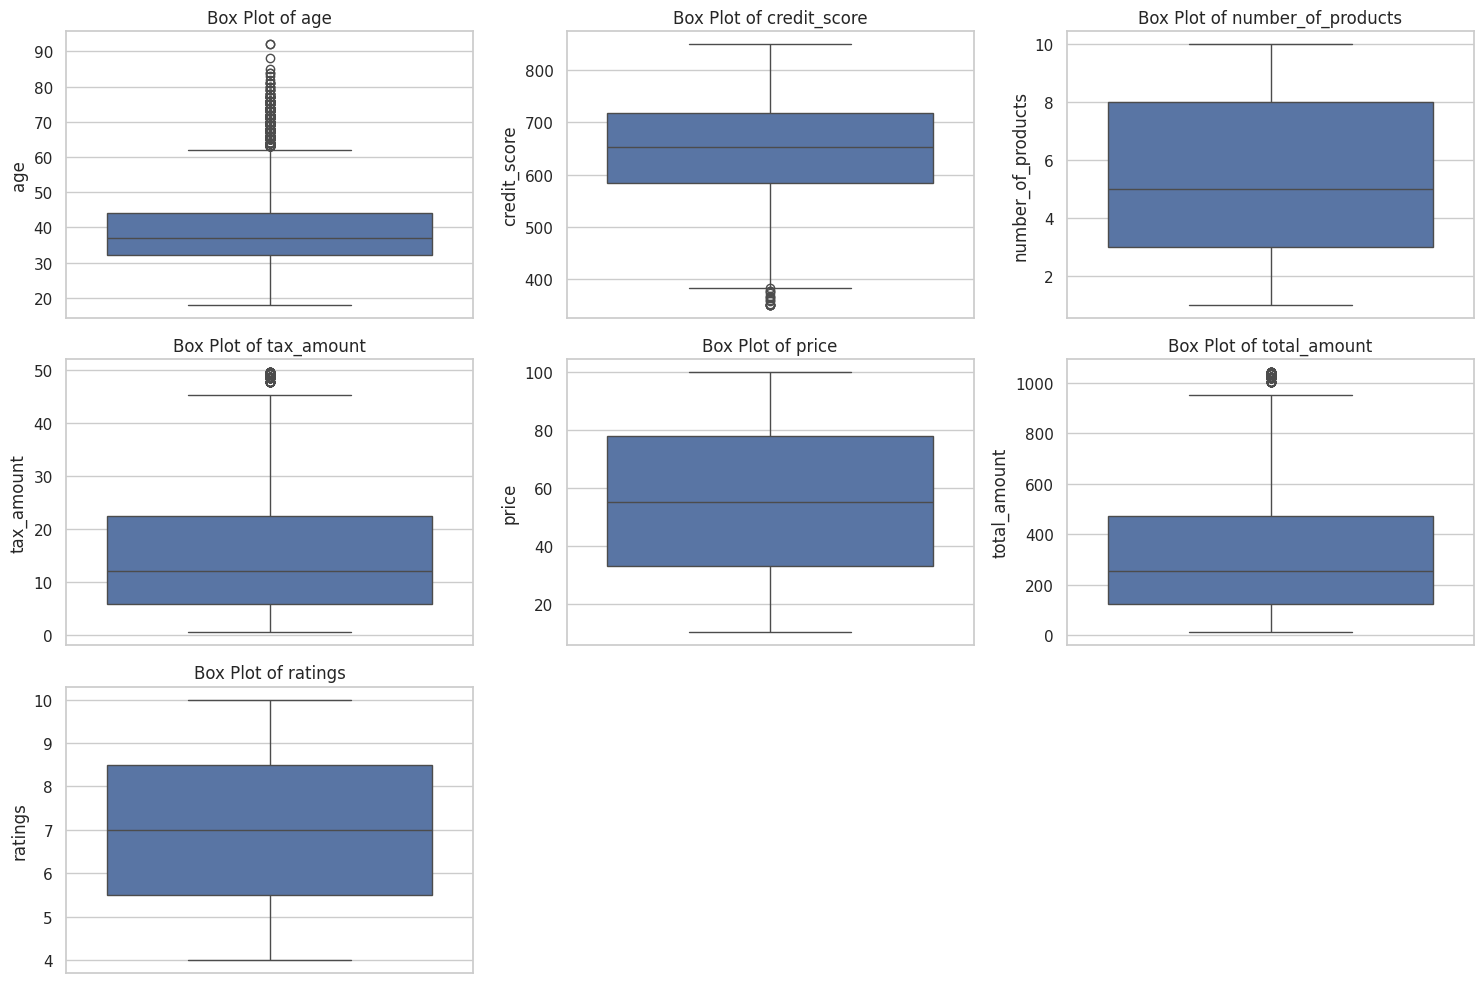

In [ ]:
# List of numerical columns to check for outliers
numerical_columns = ['age', 'credit_score', 'number_of_products', 'tax_amount', 'price', 'total_amount', 'ratings']

# Creating box plots for each numerical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


Handling outliers by using capping method

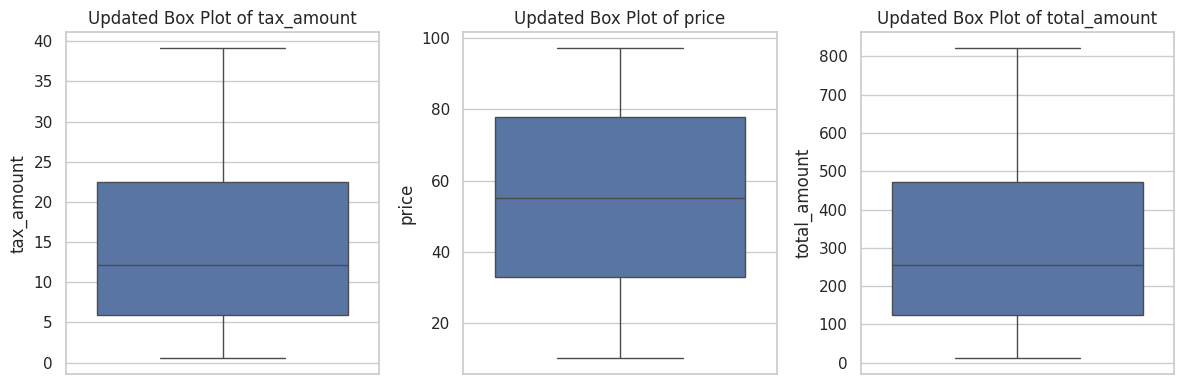

In [ ]:
# Defining the percentile threshold for capping
percentile_threshold = 95

# Applying capping to the 'Tax Amount', 'Price', and 'Total Amount' columns
for col in ['tax_amount', 'price', 'total_amount']:
    # Calculate the threshold value at the 95th percentile
    threshold_value = data[col].quantile(percentile_threshold / 100)
    # Cap values above the threshold
    data[col] = data[col].clip(upper=threshold_value)

# Verify the changes by plotting the updated box plots for the affected columns
plt.figure(figsize=(12, 4))

for i, col in enumerate(['tax_amount', 'price', 'total_amount']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Updated Box Plot of {col}')

plt.tight_layout()
plt.show()



Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Creating scaler objects
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Selecting numerical columns for scaling (excluding categorical one-hot encoded columns)
numerical_columns = ['age', 'credit_score', 'number_of_products', 'tax_amount', 'price', 'total_amount', 'ratings']

# Applying Standardization
data_standardized = data.copy()
data_standardized[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Applying Min-Max Scaling
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

# Displaying the first few rows of the standardized and min-max scaled data
data_standardized_head = data_standardized.head()
data_minmax_scaled_head = data_minmax_scaled.head()

data_standardized_head, data_minmax_scaled_head





(        age  credit_score  has_creditcard  is_active_member  \
 0 -0.373958     -0.222754               1                 1   
 1 -1.518201     -0.502117               0                 0   
 2  0.484225      0.149730               1                 1   
 3  0.674932     -0.719399               0                 0   
 4 -1.041433      0.439440               0                 1   
 
    number_of_products  tax_amount     price  total_amount   ratings  \
 0           -0.859010   -0.305453  0.862365     -0.305453 -0.915574   
 1            1.536635    0.816648 -0.264128      0.816648  1.063793   
 2           -1.201245   -1.225694 -1.563694     -1.225694  0.132327   
 3            0.852165    1.971291  1.424473      1.971291 -0.100540   
 4            1.536635   -0.512714 -1.394416     -0.512714 -0.799140   
 
    customer_churn  ...  gender_Female  gender_Male  customer_type_Member  \
 0               0  ...          False         True                 False   
 1               0  ...   

Visualizations

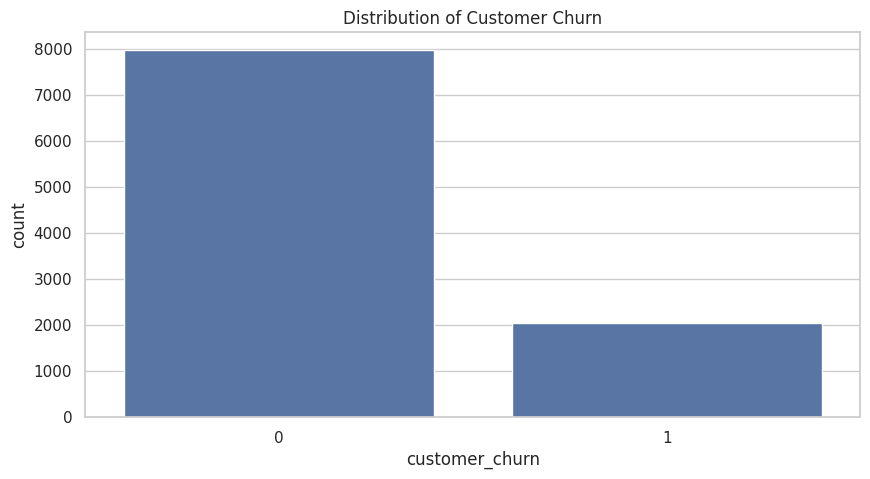

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of customer churn
plt.figure(figsize=(10, 5))
sns.countplot(x='customer_churn', data=data)
plt.title('Distribution of Customer Churn')



plt.show()




Checking the imbalance of depandant variable

In [ ]:
from imblearn.over_sampling import SMOTE

# Creating an SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target variable
X = data.drop('customer_churn', axis=1)
y = data['customer_churn']

# Applying SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
class_distribution_resampled = y_resampled.value_counts()

class_distribution_resampled


customer_churn
0    7963
1    7963
Name: count, dtype: int64

Splitting the data into Testing and Training datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Displaying the sizes of the train and test sets
X_train_shape, X_test_shape = X_train.shape, X_test.shape
X_train_shape, X_test_shape


((7000, 22), (3000, 22))

Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the Logistic Regression model with default hyperparameters
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print(accuracy_logistic)
print(classification_report_logistic)


0.8026666666666666
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2385
           1       0.58      0.14      0.23       615

    accuracy                           0.80      3000
   macro avg       0.70      0.56      0.56      3000
weighted avg       0.77      0.80      0.75      3000



Hyper parameter tuning for logistic regression model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'C': 100, 'max_iter': 200, 'solver': 'lbfgs'}
Best cross-validation score: 0.81
Test set accuracy: 0.81


Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model with default hyperparameters
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)


print(accuracy_rf)
print(classification_report_rf)

0.8156666666666667
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2385
           1       0.61      0.27      0.38       615

    accuracy                           0.82      3000
   macro avg       0.72      0.61      0.64      3000
weighted avg       0.79      0.82      0.79      3000



Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting Machine model with default hyperparameters
gbm_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gbm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_report_gbm = classification_report(y_test, y_pred_gbm)


print(accuracy_gbm)
print(classification_report_gbm)

0.8253333333333334
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2385
           1       0.69      0.27      0.39       615

    accuracy                           0.83      3000
   macro avg       0.76      0.62      0.64      3000
weighted avg       0.81      0.83      0.79      3000



Ensambling Technique using Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define base models
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = GradientBoostingClassifier(random_state=42)

# Create the Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('lr', model1),
    ('rf', model2),
    ('gbm', model3)],
    voting='hard')  # 'hard' for majority voting, 'soft' for weighted probabilities

# Fit the model on the training data
ensemble.fit(X_train, y_train)

# Predict on the testing data
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy: {:.2f}".format(accuracy_ensemble))


Ensemble Model Accuracy: 0.82


Ensambling Technique using Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_stack = stacking_model.predict(X_test)

# Evaluate the model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Model Accuracy: {accuracy_stack:.2f}")


Stacking Model Accuracy: 0.83


Multi-layer Perceptron classifier(MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instantiate the Neural Network model (Multi-layer Perceptron classifier) with default hyperparameters
nn_model = MLPClassifier(random_state=42)

# Fit the model on the training data
nn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_nn)
classification_report_mlp = classification_report(y_test, y_pred_nn)

print(accuracy_mlp)
print(classification_report_mlp)


0.8046666666666666
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2385
           1       0.61      0.13      0.21       615

    accuracy                           0.80      3000
   macro avg       0.71      0.55      0.55      3000
weighted avg       0.77      0.80      0.75      3000



Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ensure you have the correct number of features from your dataset
num_features = X_train.shape[1]

# Standardizing the features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    # First hidden layer with input shape specified
    Dense(128, input_shape=(num_features,), activation='relu'),
    # Second hidden layer
    Dense(64, activation='relu'),
    # Third hidden layer
    Dense(32, activation='relu'),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with an optimizer, loss function, and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy_nn = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy_nn:.4f}")


Epoch 1/50
700/700 [==============================] - 6s 6ms/step - loss: 0.4483 - accuracy: 0.8087 - val_loss: 0.4425 - val_accuracy: 0.8237
Epoch 2/50
700/700 [==============================] - 2s 3ms/step - loss: 0.4136 - accuracy: 0.8299 - val_loss: 0.4367 - val_accuracy: 0.8197
Epoch 3/50
700/700 [==============================] - 3s 4ms/step - loss: 0.4030 - accuracy: 0.8350 - val_loss: 0.4342 - val_accuracy: 0.8213
Epoch 4/50
700/700 [==============================] - 3s 4ms/step - loss: 0.3933 - accuracy: 0.8399 - val_loss: 0.4473 - val_accuracy: 0.8177
Epoch 5/50
700/700 [==============================] - 3s 4ms/step - loss: 0.3871 - accuracy: 0.8451 - val_loss: 0.4349 - val_accuracy: 0.8193
Epoch 6/50
700/700 [==============================] - 4s 5ms/step - loss: 0.3813 - accuracy: 0.8424 - val_loss: 0.4458 - val_accuracy: 0.8210
Epoch 7/50
700/700 [==============================] - 2s 4ms/step - loss: 0.3768 - accuracy: 0.8459 - val_loss: 0.4442 - val_accuracy: 0.8170
Epoch 

Plotting Accuracy of the models

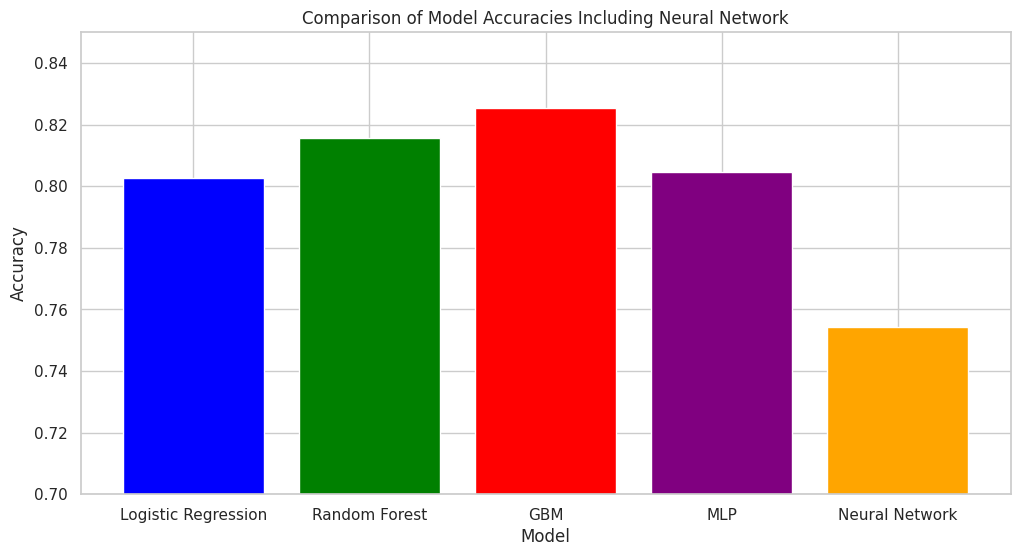

In [ ]:
import matplotlib.pyplot as plt

# Updated list of model names to include Neural Network
model_names_updated = ['Logistic Regression', 'Random Forest', 'GBM', 'MLP', 'Neural Network']


accuracies_updated = [accuracy_logistic, accuracy_rf, accuracy_gbm, accuracy_mlp, test_accuracy_nn]

# Creating the updated bar plot
plt.figure(figsize=(12, 6))
plt.bar(model_names_updated, accuracies_updated, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies Including Neural Network')
plt.ylim(0.7, 0.85)
plt.show()
